# Removendo outliers Continuação

No notebook anterior, foi feita a remoção de outliers utilizando uma metodologia específica.  
Neste notebook será usado a mesma metodologia, mas será feito o desagrupamento dos dados e uma análise modular.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(14, 6))

In [2]:
dados = pd.read_csv('../dados/aluguel_residencial_final.csv', sep=';')

<AxesSubplot:title={'center':'Valor'}, xlabel='Tipo'>

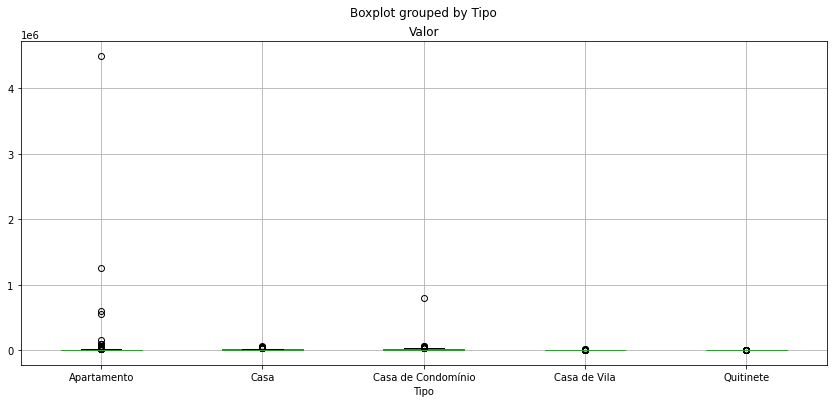

In [3]:
# faz um boxplot individual pra cada tipo
dados.boxplot('Valor', by='Tipo')

> Como esse agrupamento possui valores muito discrepantes, isso pode dificultar a visualização em conjunto

## Agrupando as variáveis

In [4]:
grupo_tipo = dados.groupby('Tipo')
type(grupo_tipo)

pandas.core.groupby.generic.DataFrameGroupBy

### Agruparemos a variável tipo, mas dessa vez apenas para a variável valor, não para todo dataframe

In [5]:
grupo_tipo = dados.groupby('Tipo')['Valor']
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

> Repare agora que esse agrupamento é do tipo SeriesGroupBy

### Visualizando o agrupamento

In [6]:
grupo_tipo.groups

{'Apartamento': [2, 3, 4, 7, 8, 9, 11, 13, 14, 15, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 79, 80, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, ...], 'Casa': [1, 22, 54, 57, 96, 100, 144, 160, 180, 238, 250, 253, 264, 286, 310, 316, 334, 339, 357, 378, 385, 399, 424, 434, 474, 475, 481, 511, 542, 543, 567, 571, 572, 618, 621, 630, 635, 636, 660, 676, 700, 721, 724, 760, 771, 780, 856, 873, 937, 982, 1029, 1036, 1118, 1123, 1125, 1157, 1178, 1249, 1256, 1316, 1335, 1350, 1371, 1412, 1426, 1430, 1440, 1445, 1472, 1475, 1488, 1586, 1604, 1656, 1662, 1666, 1671, 1684, 1709, 1717, 1762, 1810, 1835, 1875, 1905, 1933, 1942, 1960, 2019, 2039, 2056, 2075, 2101, 2107, 2108, 2133, 2170, 2201, 2204, 2211, ...], 'Casa 

## Estatísticas da variável

In [19]:
# criamos novamente as estatísticas e os limites
# cada variável vira uma Series por tipo de imóvel
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

#### Agora cada variável é uma Series por Tipo

In [8]:
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [9]:
Q3

Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [10]:
IIQ

Tipo
Apartamento            3300.0
Casa                   8700.0
Casa de Condomínio    11250.0
Casa de Vila           1050.0
Quitinete               600.0
Name: Valor, dtype: float64

In [11]:
limite_inferior

Tipo
Apartamento           -3250.0
Casa                 -11950.0
Casa de Condomínio   -12875.0
Casa de Vila           -825.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [12]:
limite_superior

Tipo
Apartamento            9950.0
Casa                  22850.0
Casa de Condomínio    32125.0
Casa de Vila           3375.0
Quitinete              2400.0
Name: Valor, dtype: float64

### Acessando um tipo específico

In [20]:
limite_inferior['Apartamento']

-3250.0

In [13]:
limite_superior['Casa']

22850.0

## Excluindo Outliers com Vários Grupos

![](../dados/boxplot.jpg)

In [14]:
for tipo in grupo_tipo.groups.keys():
    print(tipo)

Apartamento
Casa
Casa de Condomínio
Casa de Vila
Quitinete


> Note que são acessadas as chaves do dicionário criado com o groupby.groups

In [22]:
dados_new = pd.DataFrame()
# gera um novo dataframe vazio para fazer a concatenação
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    # seleciona o tipo de imóvel desejado nos dados
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    # pega o tipo desejado apenas dentro da faixa estatistica desejada
    selecao = eh_tipo & eh_dentro_limite
    # junta as duas seleções
    dados_selecao = dados[selecao]
    # passa a seleção para um novo dataframe
    dados_new = pd.concat([dados_new, dados_selecao])
    # concatena dataframe gerado no laço em um outro novo dataframe

<AxesSubplot:title={'center':'Valor'}, xlabel='Tipo'>

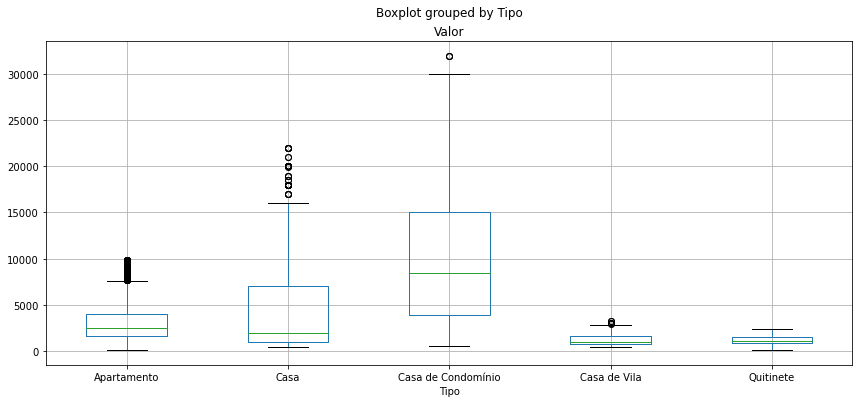

In [23]:
# agora é feita uma análise mais elaborada para cada grupo
dados_new.boxplot('Valor', by='Tipo')

> Repare que os dados foram limpos e o boxplot foi aplicado para cada tipo de imóvel

## Exportando para utilizações futuras

In [17]:
dados_new.to_csv('../dados/aluguel_residencial_sem_outliers.csv', sep=';', index=False)